In [143]:
#Setup

#Run if on a clean python install.
#! pip install numpy

#Load dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statistics

In [ ]:
#Q1.

Yes

In [31]:
#Q2.


#a.
x=1-(0.16+0.16+0.22+0.26)
print(f"x=",x)
#x=0.2

#The property I am using is that the sum of each row of a stochastic matrix is 1.
#This holds mathematically because each row contains the probability of every possible state change from n to n+1.
#Since probabilities need to sum to 1, and each row contains all probabilities of an event, each row must sum to 1.


#b.
#Initial distribution states
pi0=np.array([0.13,0.24,0.32,0.28,0.03])

#Write up P
P=np.array([[0.21,0.07,0.15,0.11,0.46],[0,1,0,0,0],[0.16,0.16,0.22,0.2,0.26],[0,0,0,1,0],[0.21,0.27,0.18,0.24,0.1]])
print(P)

#Raising a stochastic matrix to the x power gives the distribution of states after x generations
#First generation is P^1, so pi*P
print(f"The first generation is",np.matmul(pi0,P))
#Second generation
print(f"The second generation is",np.matmul(pi0,np.linalg.matrix_power(P,2)))
#Third generation
print(f"The third generation is",np.matmul(pi0,np.linalg.matrix_power(P,3)))

#Over time, the distribution tends towards B and D.  This makes sense, as B and D are absorbing states.


#c.
P2=np.array([[0.21,0.15,0.46,0.07,0.11],[0.16,0.22,0.26,0.16,0.2],[0.21,0.18,0.1,0.27,0.24],[0,0,0,1,0],[0,0,0,0,1]])
print(P2)

#R is the upper right corner of P, so P14 through P35
R=np.array([[0.07,0.11],[0.16,0.2],[0.27,0.24]])
print(f"R=",R)

#Q is the upper left corner of P, so P11 through P33
Q=np.array([[0.21,0.15,0.46],[0.16,0.22,0.26],[0.21,0.18,0.1]])
print(f"Q=",Q)


#d.
#So I need to calculate N, which is (I-Q)^-1.
#I is the identity matrix
#Q is from earlier and is all states from the matrix that are transient to transient
I=np.eye(3)
N=np.linalg.matrix_power((I-Q),-1)
print(f"N=",N)


#e.
#So I need to calculate M, which is the sum of each row of N
M=np.array([sum(N[0]),sum(N[1]),sum(N[2])])
print(f"M=",M)


#f.
#So I need to calculate B, which is N dot R.  R is all states from the matrix that are transient to absorbing
B=np.matmul(N,R)
print(f"B=",B)

x= 0.19999999999999996
[[0.21 0.07 0.15 0.11 0.46]
 [0.   1.   0.   0.   0.  ]
 [0.16 0.16 0.22 0.2  0.26]
 [0.   0.   0.   1.   0.  ]
 [0.21 0.27 0.18 0.24 0.1 ]]
The first generation is [0.0848 0.3084 0.0953 0.3655 0.146 ]
The second generation is [0.063716 0.369004 0.059966 0.428928 0.078386]
The third generation is [0.03943598 0.4042229  0.0368594  0.4667426  0.05273912]
[[0.21 0.15 0.46 0.07 0.11]
 [0.16 0.22 0.26 0.16 0.2 ]
 [0.21 0.18 0.1  0.27 0.24]
 [0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   1.  ]]
R= [[0.07 0.11]
 [0.16 0.2 ]
 [0.27 0.24]]
Q= [[0.21 0.15 0.46]
 [0.16 0.22 0.26]
 [0.21 0.18 0.1 ]]
N= [[1.64119212 0.54556112 0.99643807]
 [0.49746757 1.53899334 0.69885928]
 [0.48243834 0.43509626 1.48338518]]
M= [3.18319131 2.7353202  2.40091979]
B= [[0.47121151 0.52878849]
 [0.46975367 0.53024633]
 [0.50390009 0.49609991]]


In [37]:
#Q3.

#a.
alpha=350/100
beta=521/100

#I would assume it will oscillate.  This function is a variation of sinx*cosx, and both of those components oscillate.
#No other part of the equation interacts with the variables, so presumably the function will be dominated by its trigonometric components.

#b.
#I'll start by running the given code, adding the presumed variables
#Set a long enough time span to ensure trends can emerge
N=1000
#t is instantly overwritten, so its initial value isn't too important
t=0
#Start with dt as a non-factor in order to make sure things run.  Since dt is a scalar, set it to 1
dt=1

x=0
for i in range(N):
    t=i*dt
    x=x+(1/alpha)*np.sin(x)*np.cos(t)*dt+(1/beta)*np.random.normal(0,1)
#Well, first off, x is overwritten every iteration.  As such, this function gives a single point, which isn't particularly useful.
#Secondly, I don't believe that the code should be adding x to each iteration.

#Both are easy to fix.
#To fix the first, add this statement after defining x: vals.append(x)
#Then add the statement vals=[] after the first line.
#This will define an array that will store all produced x values.
#To fix the second error, just remove "x+" from the current final line.

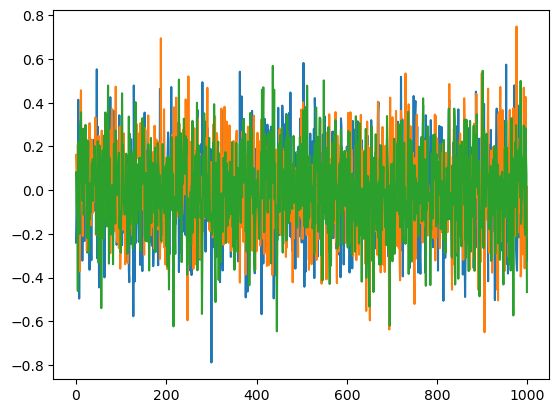

-0.0004051759742293504

In [103]:
#c.

#IS THIS SUPPOSED TO BE X=X+ FUNCTION?  IS THIS SUPPOSED TO DEPEND ON PREVIOUS VALUES? ################################################################

#I decided to make it a function to make rerunning it easier
def Q3c_walk(dt):
    N=1000
    t=0
    alpha=350/100
    beta=521/100
    vals=[]
    x=0
    dt=dt
    for i in range(N):
        t=i*dt
        x=(1/alpha)*np.sin(x)*np.cos(t)*dt+(1/beta)*np.random.normal(0,1)
        vals.append(x)
    return(vals)

walk1=Q3_walk(0.01)
walk2=Q3_walk(0.01)
walk3=Q3_walk(0.01)
plt.plot(walk1)
plt.plot(walk2)
plt.plot(walk3)
plt.show()

#The three lines differ because they have a random component.

In [109]:
#d.
#I only need the last value of each walk, so remove vals and reinsert the x+
def Q3d_walk(dt):
    N=2500
    t=0
    alpha=350/100
    beta=521/100
    x=0
    dt=dt
    for i in range(N):
        t=i*dt
        x=(1/alpha)*np.sin(x)*np.cos(t)*dt+(1/beta)*np.random.normal(0,1)
    return(x)

#Running this can take a few seconds.  Its doing 12.5 million calculations, so give it its time.

vals=[]
for i in range(1000):
    #Split into two operations because Python can get a bit wierd if you try to condense this to one line
    temp=Q3d_walk(0.01)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.01 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.05)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.05 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.1)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.1 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.2)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.2 is",np.mean(vals))

vals=[]
for i in range(1000):
    temp=Q3d_walk(0.4)
    vals.append(temp)
print(f"The mean position after 2500 steps for dt=0.4 is",np.mean(vals))

#This is more or less what I expected.  Over time, the values will logically trend toward 0 due to the oscillation and random Normal components.

The mean position after 2500 steps for dt=0.01 is 0.007309408116544418
The mean position after 2500 steps for dt=0.05 is -0.00836629681680732
The mean position after 2500 steps for dt=0.1 is 0.009673839483113143
The mean position after 2500 steps for dt=0.2 is 0.007214541496767562
The mean position after 2500 steps for dt=0.4 is 0.0015593486938244058


The mean of this walk is 0.0023476368977867253
The standard deviation of this walk is 0.19455449701272529


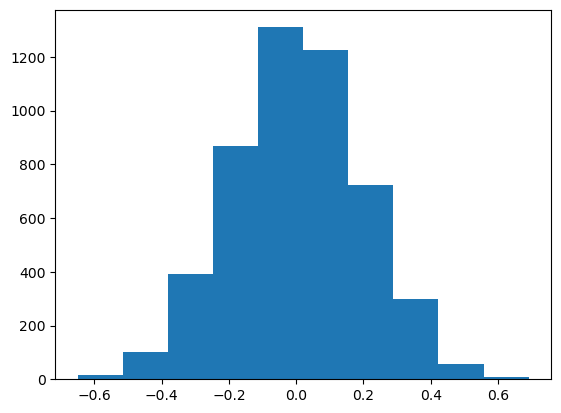

In [149]:
#e.

#Again, this will take a bit.  12.5 million calculations.

vals=[]
for i in range(5000):
    temp=Q3d_walk(0.01)
    vals.append(temp)
plt.hist(vals)

#That's pretty close to Normal.

print(f"The mean of this walk is",np.mean(vals))
print(f"The standard deviation of this walk is",statistics.stdev(vals))

In [183]:
#f.

#THIS FEELS WRONG.  CHECK IT. #############################################################################################################

x=0
vals=[]
for i in range(1000):
    x=(1/3.5)*np.sin(x)*np.cos(t)*0.01+(1/5.21)*np.random.normal(0,1)
    vals.append(x)
print(np.mean(vals))
print(statistics.stdev(vals))
#So mean of around 0 and sd of around 0.19.
print(2/0.19)
#So the probabilies of abs(x)<=2 is equal to 1-2*(the area outside 10.5 standard deviations from the mean).
#I could do the math on that, but it's basically 100%.

0.001908708328874175
0.19188770178974146


10.526315789473685